In [1]:
import os
import itertools
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()
import numpy as np
import re
import pandas as pd
from scipy.stats import norm


from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
def load_output(folder_name):
    res = {}
    for filename in os.listdir(folder_name):
        filepath = os.path.join(folder_name, filename)
        
        if not filepath.endswith(".exr"):
            continue
        
        res[filename] = []
        
        with open(filepath, newline="\n") as file:
            for line in itertools.dropwhile(lambda x: x != "B_dE1:F 1\n", file):
                break
            
            n = int(file.readline())
            for line in file:
                res[filename].append(tuple([float(x) for x in line.split(" ")]))
        
            res[filename] = np.array(res[filename])
            
    return res

In [4]:
folder_name = "./console_particles_cpu/out"
#folder_name_boostrap = "./console_particles_cpu/out_bootstrap"

particles = load_output(folder_name)
#particles_bootstrap = load_output(folder_name_boostrap)


def tryint(s):
    try:
        return int(s)
    except:
        return s

def alphanum_key(s):
    return [tryint(c) for c in re.split('([0-9]+)', s)]

def plot_mat(mat):
    xs = mat[:,0]
    ys = mat[:,1]
    zs = mat[:,2]

    fig = plt.figure(figsize=(20, 6))

    # XY plot
    ax = fig.add_subplot(131)
    sns.scatterplot(x=xs, y=ys, ax=ax)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')

    # XZ plot
    ax = fig.add_subplot(132)
    sns.scatterplot(x=xs, y=zs, ax=ax)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Z Label')

    # YZ plot
    ax = fig.add_subplot(133)
    sns.scatterplot(x=ys, y=zs, ax=ax)
    ax.set_xlabel('Y Label')
    ax.set_ylabel('Z Label')
    
    
@interact
def plot_bunch(key=sorted(particles.keys(), key=lambda x: alphanum_key(x))):
    mat = particles[key]
    #mat_bootstrap = particles_bootstrap[key]
    print(key)

    plot_mat(mat)
    #plot_mat(mat_bootstrap)

    plt.show()

interactive(children=(Dropdown(description='key', options=('bunch0.exr', 'bunch1.exr', 'bunch2.exr', 'bunch3.e…

In [5]:
def show_distplots(df):
    fig = plt.figure(figsize=(18, 4))

    ax = fig.add_subplot(131)
    ax.set_title("Distplot of F_x")
    sns.distplot(df["ForceX"], ax=ax)

    ax = fig.add_subplot(132)
    ax.set_title("Distplot of F_y")
    sns.distplot(df["ForceY"], ax=ax)

    ax = fig.add_subplot(133)
    ax.set_title("Distplot of F_z")
    sns.distplot(df["ForceZ"], ax=ax, fit=norm)

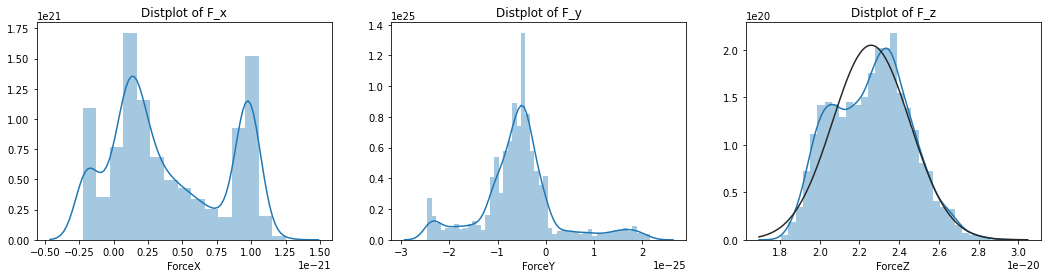

In [5]:
key = "bunch4.exr"

column_names = {0: "X_cm", 1:"Y_cm", 2:"Z_cm", 3: "ForceX", 4: "ForceY", 5: "ForceZ"}
df = pd.DataFrame(particles[key]).rename(column_names, axis=1)
#df_bootstrap = pd.DataFrame(particles_bootstrap[key]).rename(column_names, axis=1)

#df.describe()
show_distplots(df)
#show_distplots(df_bootstrap)

In [10]:
from scipy.stats import ks_2samp

dist = "ForceZ"
x = df[dist]
y = df_bootstrap[dist]

ks_2samp(x, y)

NameError: name 'df_bootstrap' is not defined

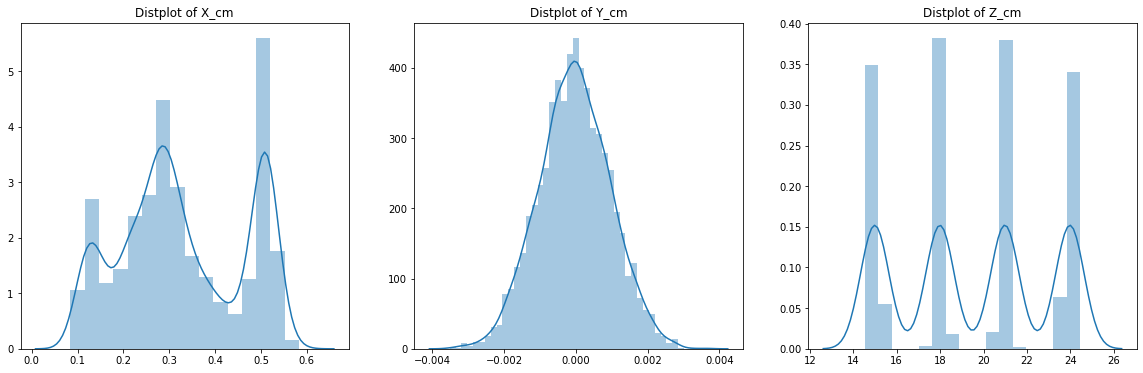

In [6]:
folder_name = "./console_particles_cpu/out"
particles = load_output(folder_name)

def plot_mat(mat):
    

    # XY plot
    ax = fig.add_subplot(131)
    sns.scatterplot(x=xs, y=ys, ax=ax)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')

    # XZ plot
    ax = fig.add_subplot(132)
    sns.scatterplot(x=xs, y=zs, ax=ax)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Z Label')

    # YZ plot
    ax = fig.add_subplot(133)
    sns.scatterplot(x=ys, y=zs, ax=ax)
    ax.set_xlabel('Y Label')
    ax.set_ylabel('Z Label')
    
    

mat = particles[key]

xs = mat[:,0]
ys = mat[:,1]
zs = mat[:,2]

fig = plt.figure(figsize=(20, 6))

ax = fig.add_subplot(131)
ax.set_title("Distplot of X_cm")
sns.distplot(xs, ax=ax)

ax = fig.add_subplot(132)
ax.set_title("Distplot of Y_cm")
sns.distplot(ys, ax=ax)

ax = fig.add_subplot(133)
ax.set_title("Distplot of Z_cm")
sns.distplot(zs, ax=ax)


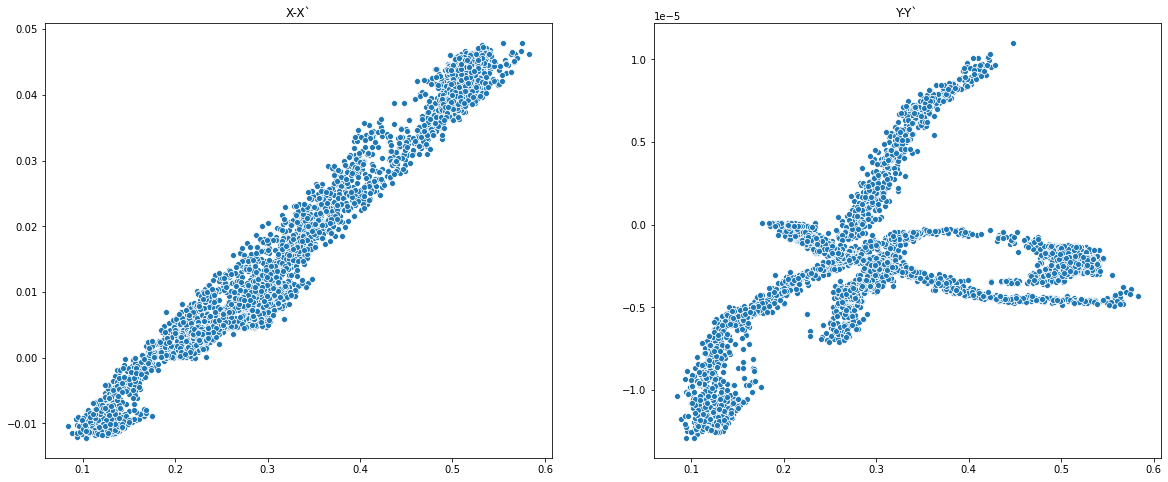

In [17]:

mat = particles[key]

xs = mat[:,0]
ys = mat[:,1]
zs = mat[:,2]

px = mat[:,3]
py = mat[:,4]
pz = mat[:,5]


fig = plt.figure(figsize=(20, 8))

ax = fig.add_subplot(121)
ax.set_title("X-X`")

sns.scatterplot(xs, px/pz, ax=ax)

ax = fig.add_subplot(122)
ax.set_title("Y-Y`")




sns.scatterplot(xs, py/pz, ax=ax)

# Строить для отдельного пучка и объяснять почему с наклоном

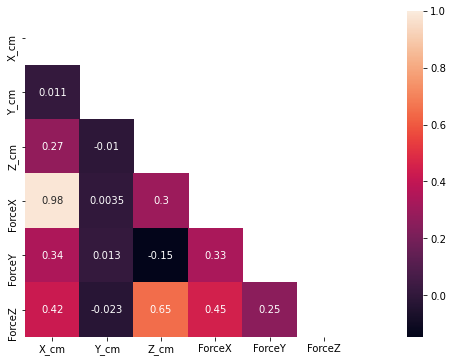

In [16]:
column_names = {0: "X_cm", 1:"Y_cm", 2:"Z_cm", 3: "ForceX", 4: "ForceY", 5: "ForceZ"}
df = pd.DataFrame(particles[key]).rename(column_names, axis=1)

fig = plt.figure(figsize=(20, 6))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, square=True, mask=matrix)

# Новые файлы

,x,y,z,px,py,pz
0,-0.000030,0.002286,-0.382239,7.168561e-19,-5.859300e-19,2.732857e-15
1,-0.001662,0.000104,-0.347940,-7.756120e-19,7.542371e-19,2.685163e-15
2,-0.003057,-0.000172,-0.326206,4.024560e-19,3.511272e-19,2.576335e-15
3,0.001190,-0.000457,-0.318037,-7.546648e-19,-1.967604e-18,2.653365e-15
4,0.000660,0.001835,-0.316804,-1.764891e-18,-6.820881e-19,2.673813e-15


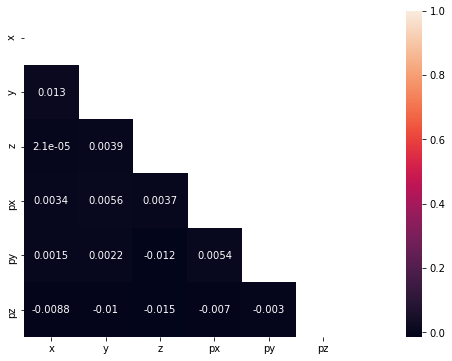

In [29]:
df1 = pd.read_csv("bunch0.exr", delimiter=" ", decimal=",", dtype=np.float64).drop(["Fx", "Fy", "Fz"], axis=1)
display(df1.head())

fig = plt.figure(figsize=(20, 6))
matrix = np.triu(df1.corr())
sns.heatmap(df1.corr(), annot=True, square=True, mask=matrix)

,x,y,z,px,py,pz
0,0.002026,-0.000064,0.004635,-2.547430e-43,-7.348030e-44,2.260680e-20
1,0.001974,0.000214,0.004362,-4.251130e-44,1.797050e-43,3.035100e-20
2,0.001839,-0.000026,-0.002497,5.037480e-44,1.502110e-44,2.967210e-20
3,0.002018,-0.000006,-0.007218,-2.915540e-44,2.848340e-43,2.672000e-20
4,0.001926,0.000008,-0.000849,-1.790450e-43,-1.020360e-43,2.226050e-20


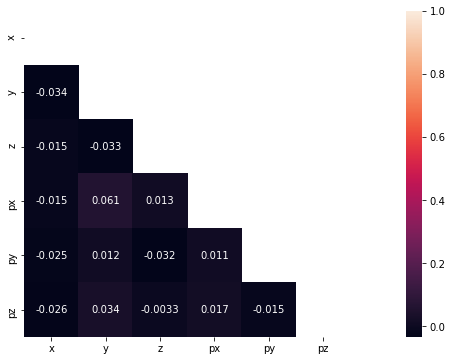

In [30]:
df2 = pd.read_csv("nikita.exr", delimiter=" ", decimal=".", dtype=np.float64)
display(df2.head())

fig = plt.figure(figsize=(20, 6))
matrix = np.triu(df2.corr())
sns.heatmap(df2.corr(), annot=True, square=True, mask=matrix)

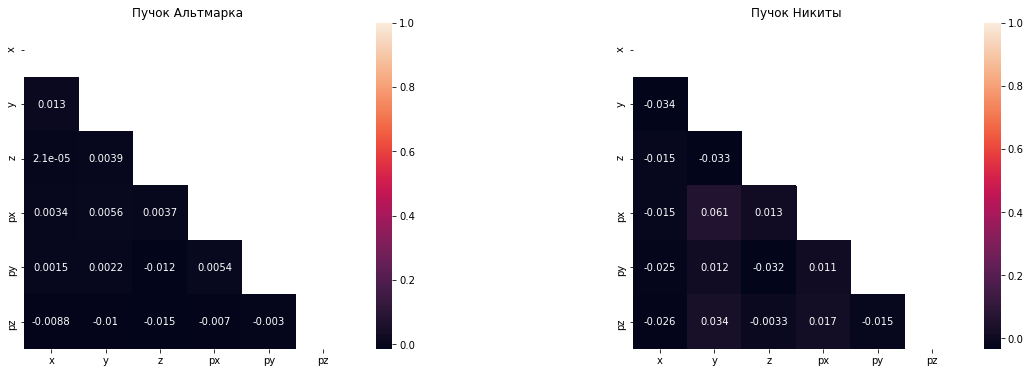

In [39]:
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(121)
ax.set_title("Пучок Альтмарка")
matrix = np.triu(df1.corr())
sns.heatmap(df1.corr(), annot=True, square=True, mask=matrix)

ax = fig.add_subplot(122)
ax.set_title("Пучок Никиты")
matrix = np.triu(df2.corr())
sns.heatmap(df2.corr(), annot=True, square=True, mask=matrix)

In [36]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

@interact()
def corelations(i=list(range(1, 45))):
    df1 = pd.read_csv(f"results3011_2/bunch{i}.exr", delimiter=" ", decimal=",", dtype=np.float64, skiprows=42, header=None)
    df1.columns = ["x", "y", "z", "px", "py", "pz", "Fx", "Fy", "Fz"]
    df1 = df1.drop(["Fx", "Fy", "Fz"], axis=1, errors="ignore")
    #display(df1.head())

    fig = plt.figure(figsize=(12, 8))
    matrix = np.triu(df1.corr())
    sns.heatmap(df1.corr(), annot=True, square=True, mask=matrix).set_title(f"Step {i}")


interactive(children=(Dropdown(description='i', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16…